In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import matplotlib
# matplotlib.use('TkAgg')  # Or 'Qt5Agg'

In [3]:
import A_Star_Pancake as asp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to run all test configurations
def run_all_tests(test_configurations):
    results = []
    
    for num_tests, pancake_size in test_configurations:
        print(f"Running tests with num_tests={num_tests} and pancake_size={pancake_size}...\n")

        # Generate random start states based on the configuration
        start_states = asp.generate_random_start_states(pancake_size, num_tests)
        
        metrics = {}
        # Iterate through each heuristic defined in the heuristics dictionary
        for heuristic_name, heuristic_func in heuristics.items():
            avg_time, avg_nodes, avg_cost, avg_memory = asp.run_tests_for_heuristic(heuristic_func, start_states, pancake_size)
            metrics[f"avg_time_{heuristic_name}"] = avg_time
            metrics[f"avg_nodes_{heuristic_name}"] = avg_nodes
            metrics[f"avg_cost_{heuristic_name}"] = avg_cost
            metrics[f"avg_memory_{heuristic_name}"] = avg_memory
        
        results.append({
            "num_tests": num_tests,
            "pancake_size": pancake_size,
            **metrics # Merge the metrics dictionary into the results dictionary
        })
    
    return pd.DataFrame(results)

heuristics = {
    "gap": asp.gap_heuristic,
    "breakpoint": asp.breakpoint_heuristic,
    "position_based": asp.position_based_heuristic,
    "simple_avg": asp.simple_averaging_heuristic,
    "weighted_avg": lambda state: asp.weighted_averaging_heuristic(state, w1=0.3, w2=0.3, w3=0.4),
    "max": asp.max_heuristic
}

# Example configurations for testing (num_tests, pancake_size)
test_configurations = [
    (100, 5),
    (200, 6),
    (200, 7),
    (100, 8),
    (30, 9),
    (10, 10),
    (1, 11)
]

# Run the tests using the defined configurations and store the results in a DataFrame
results_df = run_all_tests(test_configurations)
print(results_df)


Running tests with num_tests=100 and pancake_size=5...

Running tests with num_tests=200 and pancake_size=6...

Running tests with num_tests=200 and pancake_size=7...

Running tests with num_tests=100 and pancake_size=8...

Running tests with num_tests=30 and pancake_size=9...

Running tests with num_tests=10 and pancake_size=10...

Running tests with num_tests=1 and pancake_size=11...

   num_tests  pancake_size  avg_time_gap  avg_nodes_gap  avg_cost_gap  \
0        100             5      0.000542         13.120         4.040   
1        200             6      0.002713         53.045         5.215   
2        200             7      0.016622        291.185         6.310   
3        100             8      0.133766       1455.430         7.290   
4         30             9      1.429819      11378.900         8.700   
5         10            10     24.894901     156418.600        10.300   
6          1            11    252.521569    1262415.000        13.000   

   avg_memory_gap  avg_ti

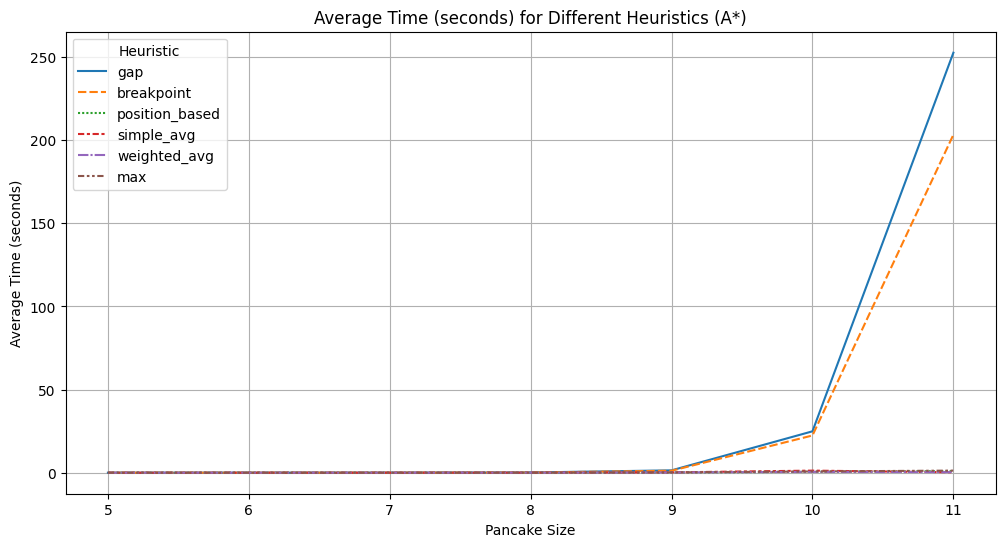

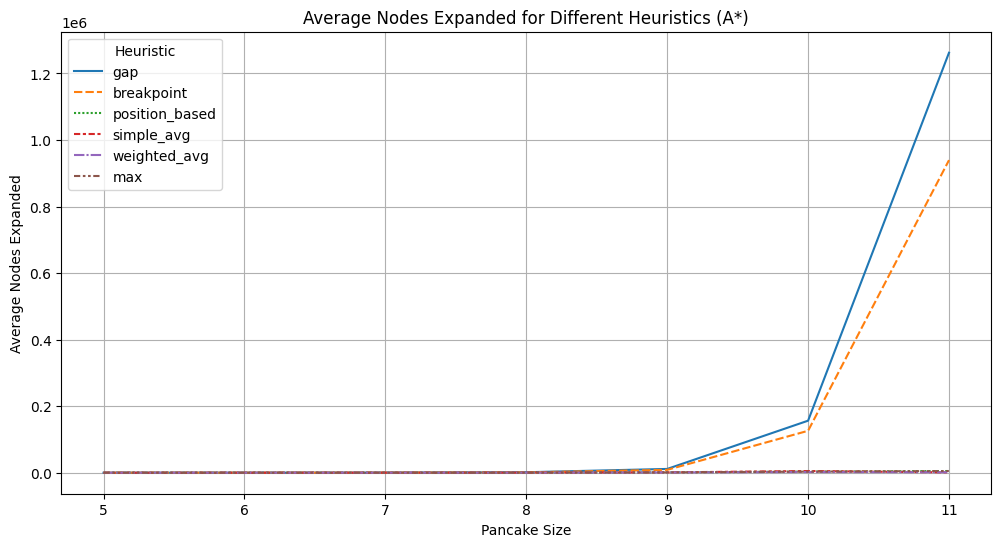

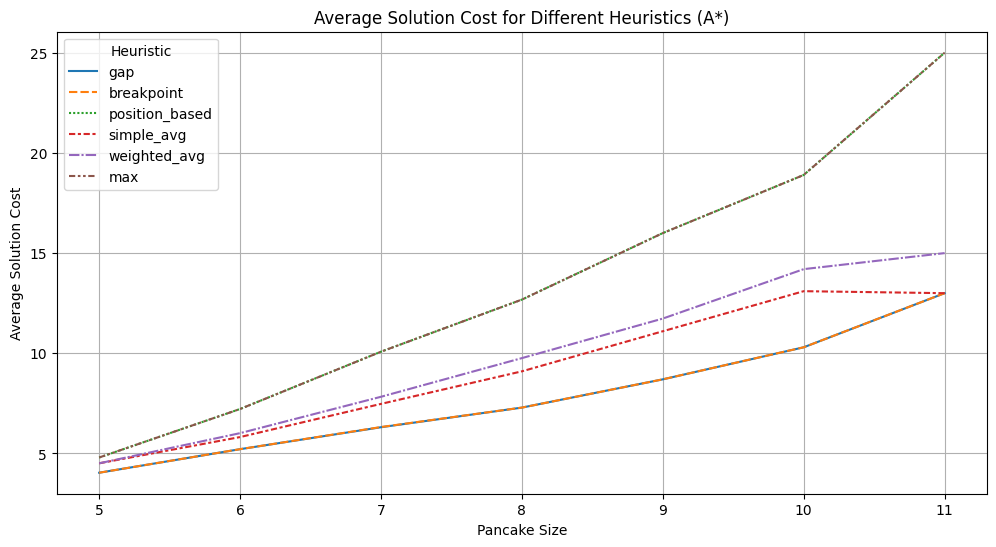

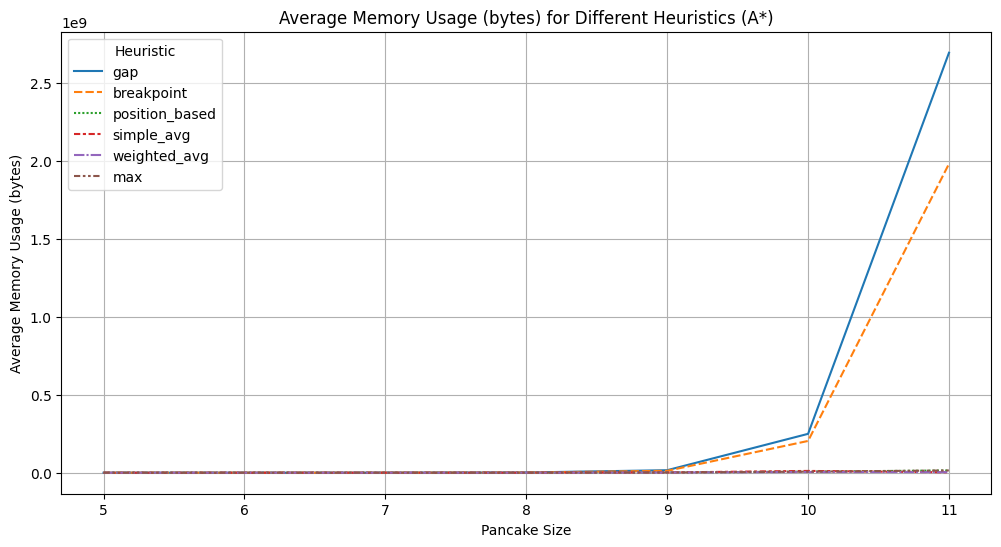

In [6]:
# Plotting function, similar to the previous plotting function for AWA*
def plot_results(df):
    metrics = ['avg_time', 'avg_nodes', 'avg_cost', 'avg_memory']
    metric_titles = {
        'avg_time': 'Average Time (seconds)',
        'avg_nodes': 'Average Nodes Expanded',
        'avg_cost': 'Average Solution Cost',
        'avg_memory': 'Average Memory Usage (bytes)'
    }
    
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        
        # Filter the dataframe for the current metric
        metric_df = df.melt(id_vars=["num_tests", "pancake_size"], 
                            value_vars=[col for col in df.columns if metric in col],
                            var_name="heuristic", value_name="value")
        
        # Extract heuristic names for the plot
        metric_df['heuristic'] = metric_df['heuristic'].apply(lambda x: x.replace(f"{metric}_", ""))
        
        # Plot the data
        sns.lineplot(data=metric_df, x='pancake_size', y='value', hue='heuristic', style='heuristic')
        
        # Set plot titles and labels
        plt.title(f'{metric_titles[metric]} for Different Heuristics (A*)')
        plt.xlabel('Pancake Size')
        plt.ylabel(metric_titles[metric])
        plt.legend(title='Heuristic')
        plt.grid(True)
        
        # Show the plot
        plt.show()

# Plot the results
plot_results(results_df)

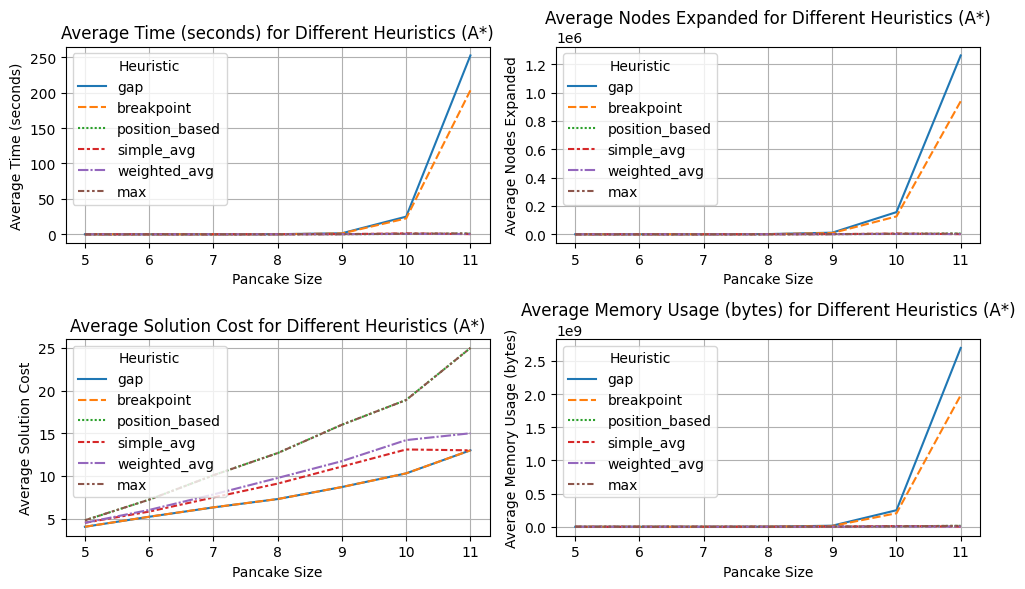

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df):
    metrics = ['avg_time', 'avg_nodes', 'avg_cost', 'avg_memory']
    metric_titles = {
        'avg_time': 'Average Time (seconds)',
        'avg_nodes': 'Average Nodes Expanded',
        'avg_cost': 'Average Solution Cost',
        'avg_memory': 'Average Memory Usage (bytes)'
    }
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    axes = axes.flatten()  # Flatten to make it easier to iterate

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Filter the dataframe for the current metric
        metric_df = df.melt(id_vars=["num_tests", "pancake_size"], 
                            value_vars=[col for col in df.columns if metric in col],
                            var_name="heuristic", value_name="value")
        
        # Extract heuristic names for the plot
        metric_df['heuristic'] = metric_df['heuristic'].apply(lambda x: x.replace(f"{metric}_", ""))
        
        # Plot the data
        sns.lineplot(data=metric_df, x='pancake_size', y='value', hue='heuristic', style='heuristic', ax=ax)
        
        # Set plot titles and labels
        ax.set_title(f'{metric_titles[metric]} for Different Heuristics (A*)')
        ax.set_xlabel('Pancake Size')
        ax.set_ylabel(metric_titles[metric])
        ax.legend(title='Heuristic')
        ax.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the figure
    plt.show()

# Plot the results
plot_results(results_df)


In [5]:
# Save results to a CSV file
results_df.to_csv('A_Star_pancake_problem_results.csv', index=False)

# Display the table
import IPython
IPython.display.display(results_df)

num_tests  pancake_size  avg_time_gap  avg_nodes_gap  avg_cost_gap  \
0        100             5      0.000542         13.120         4.040   
1        200             6      0.002713         53.045         5.215   
2        200             7      0.016622        291.185         6.310   
3        100             8      0.133766       1455.430         7.290   
4         30             9      1.429819      11378.900         8.700   
5         10            10     24.894901     156418.600        10.300   
6          1            11    252.521569    1262415.000        13.000   

   avg_memory_gap  avg_time_breakpoint  avg_nodes_breakpoint  \
0    7.872535e+04             0.000499             10.930000   
1    2.421176e+04             0.002593             43.570000   
2    1.877550e+05             0.015807            233.410000   
3    1.490694e+06             0.110282           1120.920000   
4    1.617330e+07             1.196721           8619.033333   
5    2.494539e+08            22.392323         126053.900000   
6    2.694001e+09           203.222375         939580.000000   

   avg_cost_breakpoint  avg_memory_breakpoint  ...  avg_cost_simple_avg  \
0                4.040           2.709600e+03  ...                4.510   
1                5.215           1.993392e+04  ...                5.820   
2                6.320           1.514276e+05  ...                7.475   
3                7.290           1.115427e+06  ...                9.100   
4                8.700           1.229873e+07  ...               11.100   
5               10.300           2.038463e+08  ...               13.100   
6               13.000           1.981659e+09  ...               13.000   

   avg_memory_simple_avg  avg_time_weighted_avg  avg_nodes_weighted_avg  \
0           2.428640e+03               0.000693                8.390000   
1           1.307728e+04               0.001944               29.045000   
2           7.811520e+04               0.012020               95.450000   
3           4.093402e+05               0.036435              270.200000   
4           1.784883e+06               0.171622              860.933333   
5           1.154788e+07               0.525505             2114.300000   
6           2.533804e+06               0.369674             1412.000000   

   avg_cost_weighted_avg  avg_memory_weighted_avg  avg_time_max  \
0               4.510000             2.364840e+03      0.000579   
1               6.015000             1.357752e+04      0.001292   
2               7.830000             7.622510e+04      0.006587   
3               9.760000             3.095902e+05      0.023835   
4              11.733333             1.411674e+06      0.198728   
5              14.200000             4.699805e+06      0.766246   
6              15.000000             3.847012e+06      1.272587   

   avg_nodes_max  avg_cost_max  avg_memory_max  
0       7.910000          4.80    2.217520e+03  
1      19.380000          7.22    8.800840e+03  
2      58.245000         10.08    4.375428e+04  
3     201.640000         12.68    2.048764e+05  
4    1098.233333         16.00    1.614021e+06  
5    3275.100000         18.90    6.826776e+06  
6    5109.000000         25.00    1.458628e+07  

[7 rows x 26 columns]